In [1]:
from __future__ import print_function

import tensorflow.keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras import optimizers
from tensorflow.keras import backend as K
from tensorflow.keras import regularizers

import numpy as np
import matplotlib.pyplot as plt
import json

from cifar10vgg import cifar10vgg
from noise import noisy, check_noise_robustness_multiple_rounds
from data_manager import load_data

from IPython.display import clear_output

%config Completer.use_jedi = False

C:\Users\Andrei\Anaconda3\envs\opencv-env\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Andrei\Anaconda3\envs\opencv-env\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Andrei\Anaconda3\envs\opencv-env\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Andrei\Anaconda3\envs\opencv-env\lib\site-pack

In [105]:
(x_train, y_train), (x_test, y_test) = load_data("cifar10")        

In [2]:
model = cifar10vgg(train = False)

predicted_x = model.predict(x_test)
residuals = np.argmax(predicted_x,1)!=np.argmax(y_test,1)

loss = sum(residuals)/len(residuals)
print("the validation 0/1 loss is: ",loss)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
the validation 0/1 loss is:  0.0641


In [3]:
residuals = np.argmax(predicted_x,1)==np.argmax(y_test,1)
acc = sum(residuals)/len(residuals)
print("Top-1 accuracy:", acc)

Top-1 accuracy: 0.9359


1679

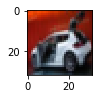

In [36]:
i = 6
img = x_test[i]
np.shape(img)
plt.figure(figsize=(1.2,1.2))
plt.imshow(img/255)
np.argmax(model.predict(np.array([img])))
np.argmax(y_test[i])

In [104]:
sample_x = np.copy(x_test)
sample_y = np.copy(y_test)

In [15]:
agreements, saved_noisy_imgs = check_noise_robustness_multiple_rounds(model, sample_x, sample_y, 20)

Step  19


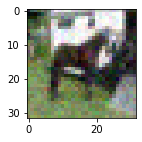

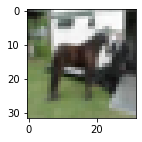

In [49]:
i = 20
plt.figure(figsize=(2,2))

plt.imshow(saved_noisy_imgs[i]/255)
plt.show()
plt.figure(figsize=(2,2))

plt.imshow(x_test[i]/255)
plt.show()

In [18]:
agreements.sum() / len(sample_x)

0.4747

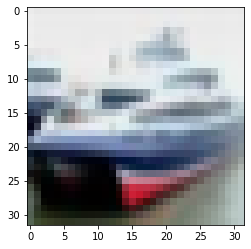

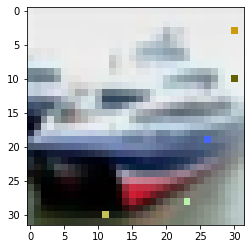

In [128]:
image = np.copy(x_test[1])
row,col,ch= image.shape
plt.imshow(image/255)
plt.show()
cells_count = 5
for i in range(cells_count):
    cell_x = np.random.randint(row)
    cell_y = np.random.randint(col)
    for channel in range(ch):
        image[cell_x][cell_y][channel] = np.random.randint(255)
plt.imshow(image/255)
plt.show()

In [126]:
noisy_pred = model.predict(np.array(noisy_imgs))

NameError: name 'noisy_imgs' is not defined

In [ ]:
noisy_labels = np.argmax(noisy_pred, axis=1)

In [ ]:
correct_labels = np.argmax(y_test, axis = 1)

In [ ]:
(noisy_labels == correct_labels).sum() / len(x_test)

In [ ]:
count = 0
count_correct = 0
samples = 5
K = len(x_test)
# K = 2000
noisy_imgs = []
correct_labels = []
for i in range(K):
    for j in range(samples):
#         i = 6
        img = x_test[i]
        np.shape(img)
        # plt.imshow(img/255)
        model_pred = np.argmax(model.predict(np.array([img])))
        correct_label = np.argmax(y_test[i])
        if(model_pred == correct_label):
            count_correct = count_correct + 1
        img_noise = noisy(img)
#         noisy_pred = np.argmax(model.predict(np.array([img_noise])))
        correct_labels.append(correct_label)
        noisy_imgs.append(img_noise)
#         if(model_pred == correct_label and noisy_pred != correct_label):
#             if(i %50 == 0):
#                 print("correct class: ", correct_label)
#                 print("predicted noisy class: ", noisy_pred)
#                 print("correct class model probability: ", model.predict(np.array([img]))[0][correct_label])
#                 print("correct class noisy model probability: ", model.predict(np.array([img_noise]))[0][correct_label])
#                 plt.figure(figsize=(1.2,1.2))
#                 plt.imshow(img_noise/255)
#                 plt.show()
#             count = count + 1
#             break
print(count)

In [ ]:
np.shape(noisy_imgs)
predicted_x = model.predict(np.array(noisy_imgs))
correct_predictions = np.argmax(predicted_x,1)==correct_labels

In [ ]:
residuals

In [ ]:
list_objects = []
count_wrong = 0
for x in range(K):
    wrong = False
    for i in range(samples):
        index = x * samples + i
        if(correct_predictions[index] == False):
            if(residuals[x] == True):
                obj = {}
                obj["noisy_img"] = noisy_imgs[index].tolist()
                obj["img"] = x_test[x].tolist()
                obj["noisy_pred"] = predicted_x[x].tolist()
                obj["pred"] = int(correct_labels[x])
                list_objects.append(obj)
            wrong = True
            break
    if wrong:
        count_wrong += 1

In [ ]:
print("Initial accuracy")
count_correct /samples / K

In [ ]:
print("Noisy accuracy")
1-(count_wrong/K)

In [ ]:
with open('data/corrupted_images.json', 'w', encoding='utf-8') as f:
    json.dump(list_objects, f, ensure_ascii=False, indent=4)

In [ ]:
with open('data/corrupted_images.json') as json_file:
    data = json.load(json_file)

In [ ]:
i = 102
plt.figure(figsize=(2,2))
img = np.array(data[i]["noisy_img"])/255

plt.imshow(img)
# np.shape(img)

###### 

In [ ]:
len(data)